In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
df_nyc = pd.read_csv('https://raw.githubusercontent.com/som-choudhary/Airbnb/main/Airbnb_new.csv')

In [3]:
df_nyc.shape

(42638, 17)

In [4]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42638 entries, 0 to 42637
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      42638 non-null  int64  
 1   id                              42638 non-null  int64  
 2   name                            42624 non-null  object 
 3   host_id                         42638 non-null  int64  
 4   host_name                       42582 non-null  object 
 5   borough                         42571 non-null  object 
 6   neighbourhood                   42638 non-null  object 
 7   latitude                        42607 non-null  float64
 8   longitude                       42609 non-null  float64
 9   room_type                       42552 non-null  object 
 10  price                           42602 non-null  float64
 11  minimum_nights                  42604 non-null  float64
 12  number_of_reviews               

In [5]:
df_nyc.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                14
host_id                              0
host_name                           56
borough                             67
neighbourhood                        0
latitude                            31
longitude                           29
room_type                           86
price                               36
minimum_nights                      34
number_of_reviews                   25
last_review                       8746
reviews_per_month                 8736
calculated_host_listings_count      16
availability_365                    42
dtype: int64

In [6]:
df_nyc.isnull().sum()*100/df_nyc.shape[0]

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.032835
host_id                            0.000000
host_name                          0.131338
borough                            0.157137
neighbourhood                      0.000000
latitude                           0.072705
longitude                          0.068014
room_type                          0.201698
price                              0.084432
minimum_nights                     0.079741
number_of_reviews                  0.058633
last_review                       20.512219
reviews_per_month                 20.488766
calculated_host_listings_count     0.037525
availability_365                   0.098504
dtype: float64

In [7]:
df_nyc.drop(['last_review','Unnamed: 0','reviews_per_month'],axis = 1, inplace = True)

In [8]:
df_nyc.isnull().sum()

id                                 0
name                              14
host_id                            0
host_name                         56
borough                           67
neighbourhood                      0
latitude                          31
longitude                         29
room_type                         86
price                             36
minimum_nights                    34
number_of_reviews                 25
calculated_host_listings_count    16
availability_365                  42
dtype: int64

In [9]:
df_nyc.dropna(how = 'any', inplace = True)

In [10]:
df_nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
borough                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
df_nyc

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,6.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,1.0,194.0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,murray hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,1.0,129.0
7,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,upper west side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,1.0,6.0
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,south slope,40.66829,-73.98779,Private room,89.0,4.0,167.0,3.0,314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42633,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,williamsburg,40.71232,-73.94220,Entire home/apt,170.0,1.0,0.0,3.0,365.0
42634,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,jamaica,40.69137,-73.80844,Private room,65.0,1.0,0.0,2.0,163.0
42635,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,bedford-stuyvesant,40.67853,-73.94995,Private room,70.0,2.0,0.0,2.0,9.0
42636,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,bushwick,40.70184,-73.93317,Private room,40.0,4.0,0.0,2.0,36.0


In [12]:
df_nyc.borough.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Brookly', 'Staten Island',
       'Bronx', 'Queen', 'Manhattn', 'Manhatteen', 'Mahattan'],
      dtype=object)

In [13]:
df_nyc.borough.replace('Brookly','Brooklyn',inplace = True)

In [14]:
df_nyc.borough.replace('Manhattn','Manhattan',inplace = True)

In [15]:
df_nyc.borough.replace('Manhatteen','Manhattan',inplace = True)

In [16]:
df_nyc.borough.replace('Mahattan','Manhattan',inplace = True)

In [17]:
df_nyc.borough.replace('Queen','Queens',inplace = True)

In [18]:
df_nyc.borough.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [19]:
d2 = df_nyc.groupby('borough')

In [20]:
d2.price.describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,686.0,87.530612,125.026134,10.0,45.0,65.0,90.0,2500.0
Brooklyn,19197.0,124.267959,187.638102,0.0,60.0,90.0,150.0,10000.0
Manhattan,16870.0,195.048488,293.722429,0.0,90.0,146.0,219.0,10000.0
Queens,5213.0,99.308076,173.020305,10.0,50.0,74.0,110.0,10000.0
Staten Island,339.0,99.749263,106.346226,20.0,50.0,75.0,109.0,1250.0


Bronx                 AxesSubplot(0.1,0.679412;0.363636x0.220588)
Brooklyn         AxesSubplot(0.536364,0.679412;0.363636x0.220588)
Manhattan             AxesSubplot(0.1,0.414706;0.363636x0.220588)
Queens           AxesSubplot(0.536364,0.414706;0.363636x0.220588)
Staten Island             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

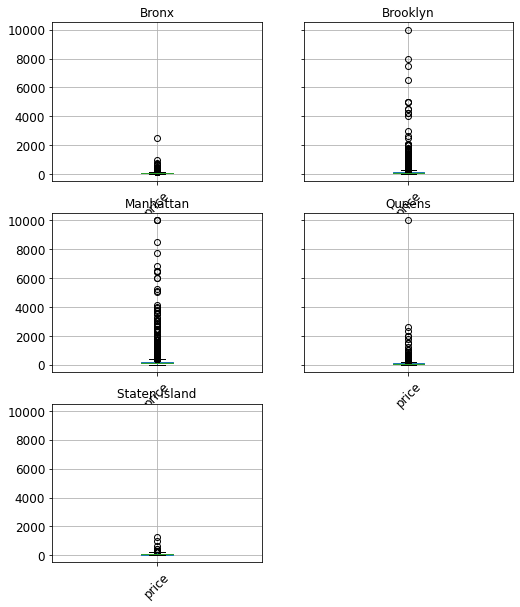

In [21]:
d2.boxplot(column = 'price',rot=45, fontsize=12, figsize=(8,10))  

<AxesSubplot:>

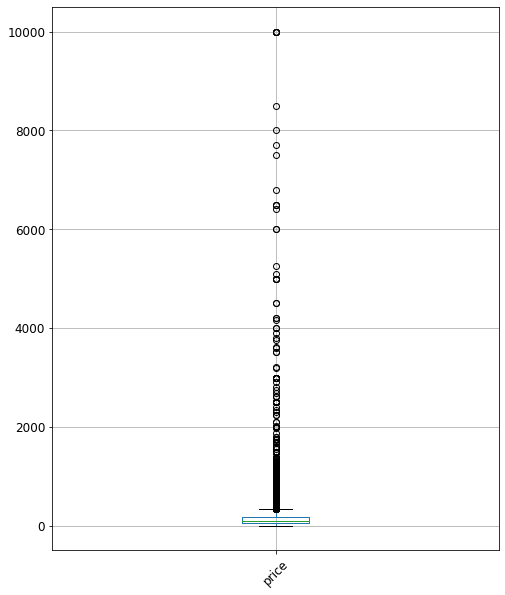

In [22]:
df_nyc.boxplot(column = 'price',rot=45, fontsize=12, figsize=(8,10))

In [23]:
qlow = df_nyc.price.quantile(0.01)

In [24]:
qlow

30.0

In [25]:
qhi = df_nyc.price.quantile(0.75)

In [26]:
qhi

174.0

In [27]:
iqr = qhi - qlow

In [28]:
df_nyc2 = df_nyc[~((df_nyc.price < (qlow - 1.5 * iqr)) |(df_nyc.price > (qhi + 1.5 * iqr)))]

In [29]:
df_nyc2

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,6.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,1.0,194.0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,murray hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,1.0,129.0
7,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,upper west side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,1.0,6.0
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,south slope,40.66829,-73.98779,Private room,89.0,4.0,167.0,3.0,314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42633,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,williamsburg,40.71232,-73.94220,Entire home/apt,170.0,1.0,0.0,3.0,365.0
42634,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,jamaica,40.69137,-73.80844,Private room,65.0,1.0,0.0,2.0,163.0
42635,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,bedford-stuyvesant,40.67853,-73.94995,Private room,70.0,2.0,0.0,2.0,9.0
42636,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,bushwick,40.70184,-73.93317,Private room,40.0,4.0,0.0,2.0,36.0


In [30]:
df_nyc2.price.describe()

count    40548.000000
mean       121.324258
std         73.400136
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        390.000000
Name: price, dtype: float64

<AxesSubplot:>

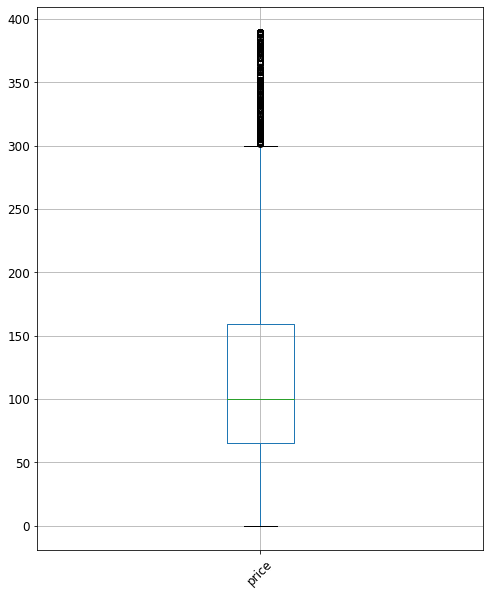

In [31]:
df_nyc2.boxplot(column = 'price',rot=45, fontsize=12, figsize=(8,10))

In [32]:
d3 = df_nyc2.groupby('borough')

Bronx                 AxesSubplot(0.1,0.679412;0.363636x0.220588)
Brooklyn         AxesSubplot(0.536364,0.679412;0.363636x0.220588)
Manhattan             AxesSubplot(0.1,0.414706;0.363636x0.220588)
Queens           AxesSubplot(0.536364,0.414706;0.363636x0.220588)
Staten Island             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

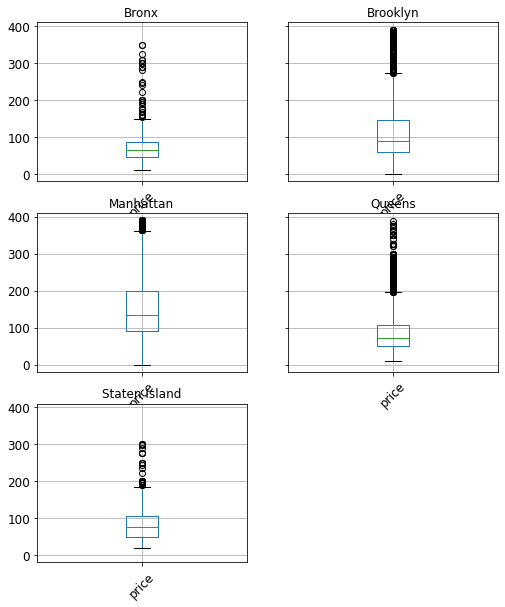

In [33]:
d3.boxplot(column = 'price',rot=45, fontsize=12, figsize=(8,10))  

In [34]:
d3.price.describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,674.0,75.551929,48.030802,10.0,45.0,65.0,87.75,350.0
Brooklyn,18737.0,108.437210,66.031805,0.0,60.0,90.0,145.00,390.0
Manhattan,15655.0,149.799489,77.778352,0.0,90.0,135.0,199.00,390.0
Queens,5148.0,89.660839,56.875531,10.0,50.0,71.0,108.00,389.0
Staten Island,334.0,90.002994,58.776131,20.0,50.0,75.0,105.00,300.0


In [35]:
df_nyc2.index = np.arange(1, len(df_nyc2) +1)

In [36]:
df_nyc2.to_csv('df_nyc.csv')